# ライブラリのインポート

In [1]:
# 配列処理や数値計算
import numpy as np

# 科学計算処理
import scipy as sp
from scipy import stats

# Scikit-Learnから線形モデルをインポート
from sklearn import linear_model

# データ加工
import pandas as pd
from pandas import Series, DataFrame

# 可視化
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import math

# ランダムシード値の固定
np.random.seed(0)

# 課題1（大数の法則）
6面ダイスを任意の回数（nとして後で変更できるようにすること）投げるとき，投げた回数までに出た目の平均値を描画するプログラムを描け．ただし，ダイスの目が出るそれぞれ確率は1/6とする．（x軸に試行回数，y軸に平均値）

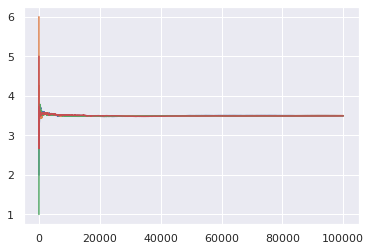

In [ ]:
# ダイスの目
# dice = np.array([1,2,3,4,5,6])
dice = np.arange(1, 7)

# ダイスを振る回数
n = 100000
count = np.arange(1, n+1)

for i in range(4):
  p = np.random.choice(dice, n).cumsum()
  plt.plot(p/count)
  plt.grid(True)


# 中心極限定理
前回の授業で使った正規分布関数（np.random.normal）を用い，平均50，標準偏差10の10000個の正規分布に従うデータを生成し，その中からN個のサンプル抽出し平均値を求めるという作業を1万回試行した際の，サンプルの平均値の分布をグラフ化（ヒストグラム）せよ．

母平均： 1.016
母分散： 1.0053440000000002
標本平均の平均： 1.0127300000000001
標本平均の分散： 0.1024131884188419


(array([  29.,  581., 1523., 3501., 2156., 1679.,  447.,   56.,   24.,
           4.]),
 array([0.  , 0.26, 0.52, 0.78, 1.04, 1.3 , 1.56, 1.82, 2.08, 2.34, 2.6 ]),
 <a list of 10 Patch objects>)

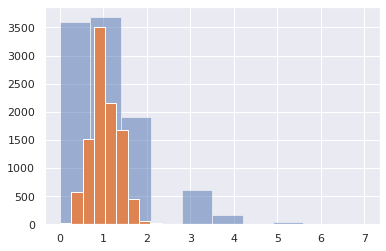

In [ ]:
# 母集団のサイズ
size = 10000

# 分布配列
# 正規分布に従う分布配列
# dist = np.random.normal(50, 10, size)

# ダイスによる一様分布配列
# dist = np.random.choice(dice, size)

# ポアソン分布に従う分布配列
dist = np.random.poisson(1, size)


print('母平均：', dist.mean())
print('母分散：', dist.var(ddof=0))

# plt.hist(dist)

# 標本サイズ
N = 10
# 標本数
n = 10000

# 標本平均を格納する配列
sample_mean = np.array([])

for _ in range(n):

  # 母集団からN個分ランダムに抽出
  choice = np.random.choice(dist, N)

  # 抽出したデータの平均値を求める
  choice_mean = choice.mean()

  # 求めた標本平均を配列に格納する
  sample_mean = np.append(sample_mean, choice_mean)

print('標本平均の平均：', sample_mean.mean())
print('標本平均の分散：', sample_mean.var(ddof=1))

plt.hist(dist, alpha=0.5)
plt.hist(sample_mean)



# カイ二乗分布

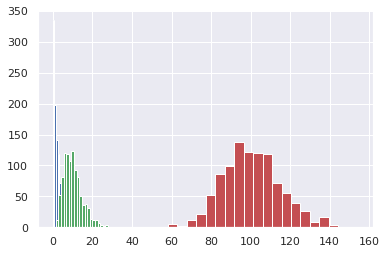

In [ ]:
# カイ二乗分布
# 自由度ddof = 2, 10, 100に従うカイ二乗分布が生成する乱数のヒストグラム

for ddof, c in zip([2,10,100], 'bgr'):
  x = np.random.chisquare(ddof, 1000)
  plt.hist(x, 20, color=c)
  
plt.grid(True)


# ｔ分布（ステューデントのt分布）

(array([  1.,   2.,  10.,  51., 268., 481., 151.,  29.,   3.,   4.]),
 array([-7.19048923, -5.84739149, -4.50429374, -3.161196  , -1.81809826,
        -0.47500051,  0.86809723,  2.21119498,  3.55429272,  4.89739047,
         6.24048821]),
 <a list of 10 Patch objects>)

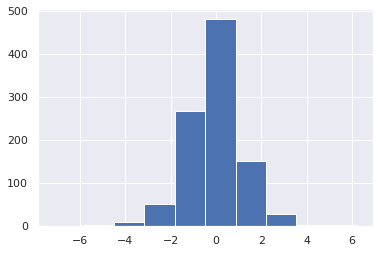

In [ ]:
# t分布
# 自由度
ddof = 5
x = np.random.standard_t(ddof, 1000)
plt.hist(x)

# 母平均の推定

| 母標準偏差 | 母集団正規性 | n | 推定手法 |
|----|----|----|----|
| 既知 | 分布はなんでもよい | いくつでもよい | z推定 |
| 未知 | 正規分布 | 30以上 | z推定 |
| 未知 | 正規分布 | 30未満 | t推定 |
| 未知 | 不明 | 30以上 | t推定 |

### 例題1
ある都市の中学生の学生数は10,000人です．この都市の中学生全体のお年玉平均金額を調べたい．そこで n = 400人の標本調査を行った．標本平均は28,000円，標本標準偏差は3,060円だった．この都市の中学生全体のお年玉の平均値を信頼度95％で推定せよ．ただし，母集団のお年玉金額の標準偏差は未知だが正規分布に従うものとする． 

In [12]:
# 信頼度
alpha = 0.95
# 標本サイズ
n = 400
# 標本平均
sample_mean = 28000
# 標本標準偏差
sample_deviation = 3060
# 標準誤差
se = sample_deviation / math.sqrt(n)

# 信頼度から求まる定数
const = stats.norm.ppf(1-(1-alpha)/2)
print(const)

# bottom = sample_mean - const * se
# up = sample_mean + const * se

# 母集団の標準偏差不明，母集団は正規分布に従う，n>30 よって，正規分布から推定する．
bottom, up = stats.norm.interval(alpha=alpha, loc=sample_mean, scale=se)
print(bottom, '< x <', up)

1.959963984540054
27700.12551036537 < x < 28299.87448963463


### 例題2
全国の歯科医院の数は約7万施設である．その中から1000施設を無作為に抽出し，そこの施設で1年間に診察した歯の疾患の患者数を調べた．標本平均は26.3人，標本標準偏差は20.0人であった．
歯科医院7万施設における歯の疾患患者数を信頼度99％で求めよ．

In [10]:
# 信頼度
alpha = 0.99
# 標本サイズ
n = 1000
# 標本平均
sample_mean = 26.3
# 標本標準偏差
sample_deviation = 20.0
# 標準誤差 SE
se = sample_deviation / math.sqrt(n)

# 信頼度から求まる定数
# ｚ推定の場合の定数
# z = stats.norm.ppf(1-(1-alpha)/2)
# ｔ推定の場合の定数
# t = stats.t.ppf(1-(1-alpha)/2, n-1)

# bottom = sample_mean - t * se
# up = sample_mean + t * se

# ｔ分布による推定
bottom, up = stats.t.interval(alpha=alpha, loc=sample_mean, scale=se, df=n-1)
print(bottom, '< x <', up)

2.580759637267628
24.667784290560867 < x < 27.932215709439134
